# Electron
Electron is a runtime that allows you to create desktop application iwth HTML, CSS and JavaScript.

For creating Desktop applications, and UI for command line tools.

Electron is a framework that combines:
- Chromium frontend: Uses Chromium Content Module for rendering web contnet(html, css, javascript)
- NodeJS backend: Provides NodeJS runtime APIs for filesystem access, networking etc,...

Using Chromium's Contnet Module to render the UI, Embeding Node.js into the same process, allowing JavaScript to access both browser APIs and Node.js API's providing IPC (Inter-Process Communication) mechanisms for the frontend and backend to communicate.

Key Components
- Main Process: A Node.js process handles application lifecycle, creates browser windows, and access native OS features
- Renderer Processes: Chromium-based processes fro each window that render the UI
- Preload Scripts: Bridge scripts that can access both Node.js and browser APIs

## Chromium Content Module
Component of Chromium browser that provides infrastrucutre for rendering web content and servers as the base for many popular browsers and applications.

Chromium content module is part of Chromium's rendering system. It sets between the the browser's UI layer and the lower-level rendering components. Its primary responsibility include:
- Implementing the multi-process architecture
- Providing a stable API for browser implementations
- Handling navigation and page loading

In electron application the Chromium Content Module provides the web rendering capabilites.

## How Electron Works
Electron applications consists of 2 primary types of processes:

Main Process: 
- Entry point of the applicaiton
- Controls application lifecycle (startup, shutdown). 
- Creates and manages render processes 
- Access operating system APIs
- Only one main process exists per application

Render Processes
- Zero or more instances can run simultaneously
- Each browser window/WebContents is a separate renderer process
- Renders Web content using Chromiums's rendering engine
- Executes front-end JavaScript code

In [ ]:
! uv pip install diagrams

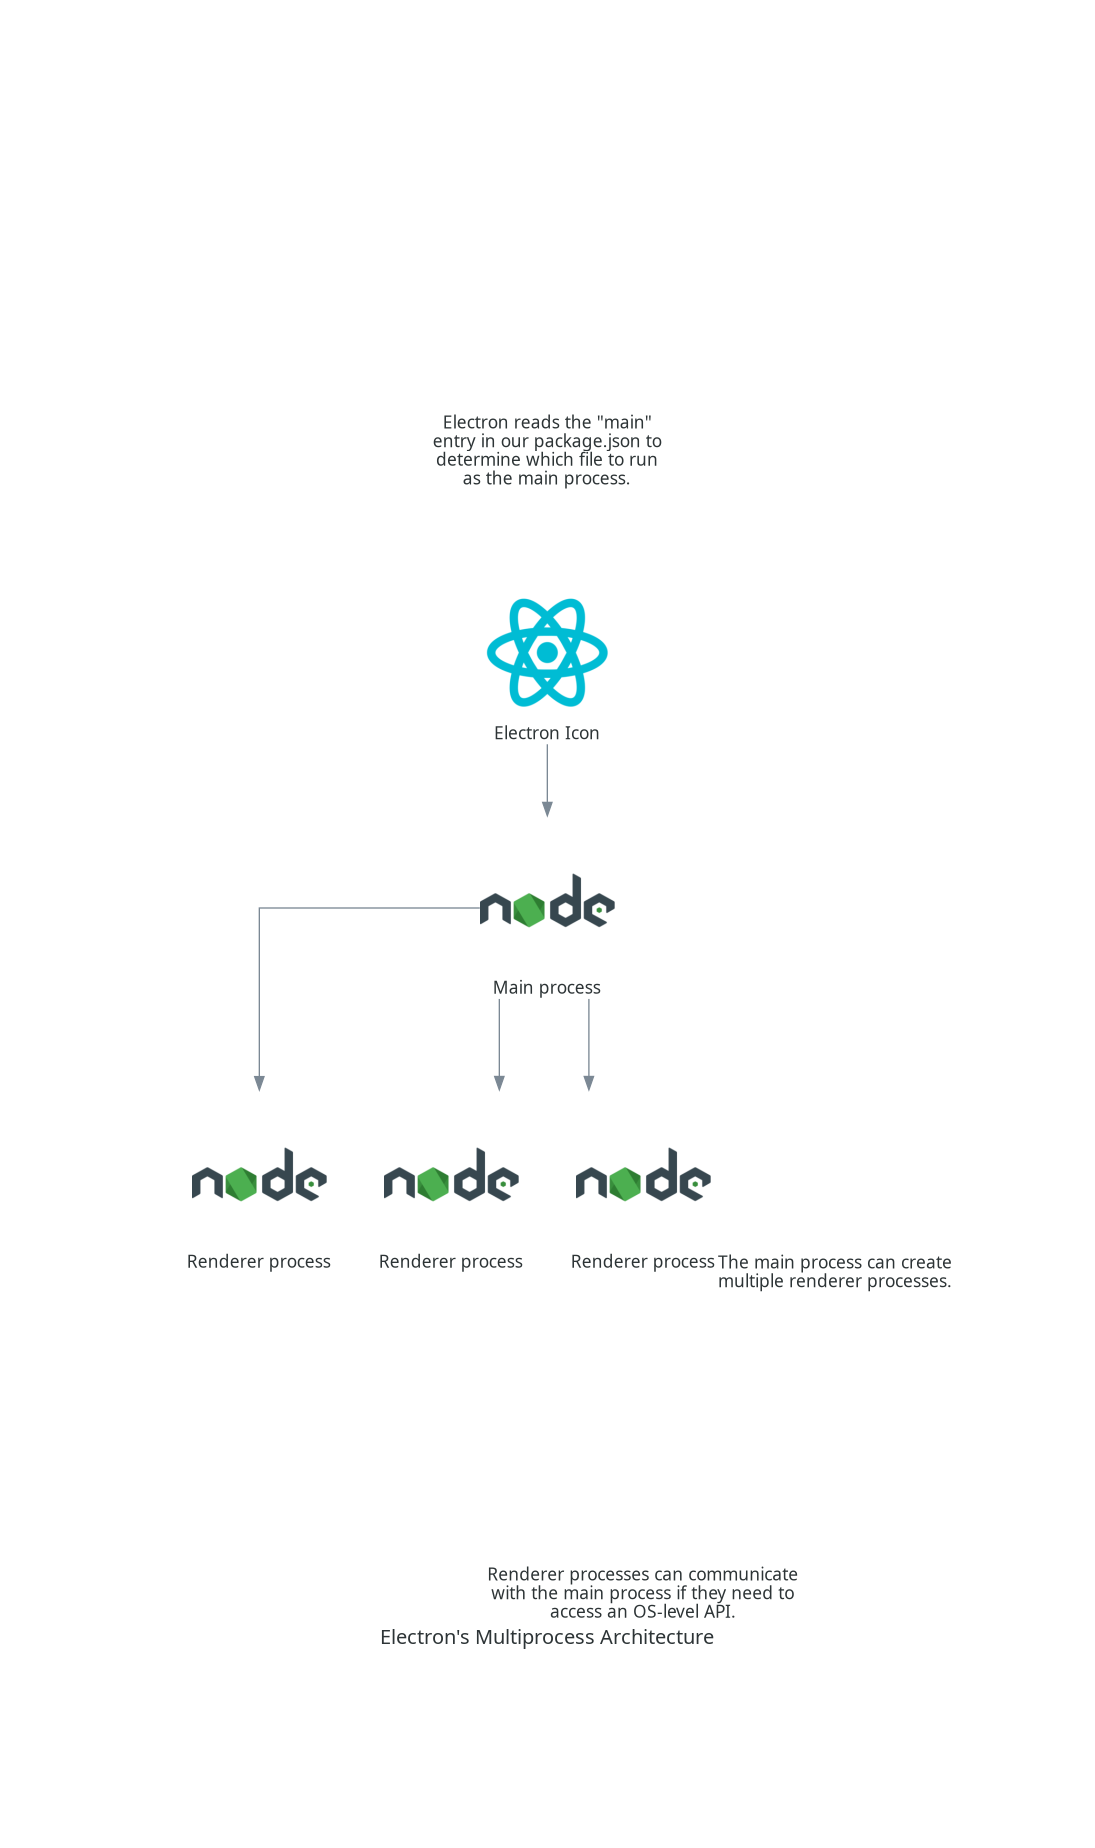

In [10]:
from diagrams import Diagram, Edge
from diagrams.programming.framework import React
from diagrams.programming.language import Nodejs
from diagrams.generic.blank import Blank
from IPython.display import Image


# Create the diagram
with Diagram("Electron's Multiprocess Architecture", show=False, direction="TB", filename="electron_architecture"):
    
    # Create the Electron icon node (using Blank with a custom label for simplicity)
    electron_icon = React("Electron Icon")
    
    # Create the text box next to the electron icon
    electron_desc = Blank("Electron reads the \"main\"\nentry in our package.json to\ndetermine which file to run\nas the main process.")
    
    # Create the boxes
    main_process = Nodejs("Main process")
    renderer1 = Nodejs("Renderer process")
    renderer2 = Nodejs("Renderer process")
    renderer3 = Nodejs("Renderer process")
    
    # Create the bottom text boxes
    main_desc = Blank("The main process can create\nmultiple renderer processes.")
    renderer_desc = Blank("Renderer processes can communicate\nwith the main process if they need to\naccess an OS-level API.")
    
    # Connect nodes
    electron_desc - Edge(style="dotted", color="white") - electron_icon
    electron_icon >> main_process
    
    main_process >> renderer1
    main_process >> renderer2
    main_process >> renderer3
    
    main_process - Edge(style="dotted", color="white") - main_desc
    renderer3 - Edge(style="dotted", color="white") - renderer_desc

Image("./electron_architecture.png")

### Application Startup
When Electron starts:
- It check the start entry in your application's package.json manifest
- This entry points to the application's entry point file
- Electron executes this file as the main process
- The main process can then create renderer processes as needed

## File Structure

- /app
- - main.js
- - renderer.js
- package.json
- test

### app folder
Where we keep our application code

We start with 2 files in our app
- main.js
- renderer.js

### package.json
Where we store list of dependencies, metadata about our applicaiton, scripts and declare where the Eletron main process is.

# Initialization
```
npx create-electron-app my-app
```
eg
```
npx create-electron-app bookmarker
```
convert to typescript

```
npm install --save-dev typescript @types/node electron-typescript-definitions copyfiles nodemon
```
nodemon is for hot reload when `npm run dev`

add file tsconfig.json

convert main.js to main.ts

and preload.js to preload.ts

lets change our main script to main.js

modify scripts in package.json


The start is where the start script runs.

to execute the script run
```
npm start
```

error
```
npm start
 bookmarker@1.0.0 start
> electron-forge start

✔ Checking your system
✔ Locating application
✔ Loading configuration
✔ Preparing native dependencies [0.1s]
✔ Running generateAssets hook
✔ Running preStart hook

[0330/173436.628282:FATAL:electron_main_delegate.cc(288)] Running as root without --no-sandbox is not supported. See https://crbug.com/638180.
```

solution
```
sudo chown root:root /home/yi/Documents/Electron/bookmarker/node_modules/electron/dist/chrome-sandbox
sudo chmod 4755 /home/yi/Documents/Electron/bookmarker/node_modules/electron/dist/chrome-sandbox
```


### Hot Reload
```
npm install nodemon --save-dev
```

add the script to package.json
```
"scripts": {
  "start": "electron-forge start",
  "dev": "nodemon --exec electron-forge start --watch src --ext js,html,css"
}
```

to start
```
npm run dev
```

# Render Process
since we specify `"module": "CommonJS"` in `tsconfig.json`, we need to import using
```
const { shell } = require('electron');
```

The main process can create multiple renderer processes using the `BrowserWindow` module. Each `BrowserWindow` is a separate and unique renderer process that includes aDOM, access to the Chromium web APIs, and the Node built-in module.

You can load the HTML file using the BrowserWindow's loadFile function.

BrowswerWindow's webContents property has openDevTools function to open dev tools.

To use the `BrowserWindow` module.

```
cont {app, BrowserWindow} = require('electron')
```

```
onst createWindow = () => {
  // Create the browser window.
  const mainWindow = new BrowserWindow({
    width: 800,
    height: 600,
    webPreferences: {
      preload: path.join(__dirname, 'preload.js'),
    },
  });

  // and load the index.html of the app.
  mainWindow.loadFile(path.join(__dirname, 'index.html'));
  // Open the DevTools.
  mainWindow.webContents.openDevTools();
};
```

```
// This method will be called when Electron has finished
// initialization and is ready to create browser windows.
// Some APIs can only be used after this event occurs.
app.whenReady().then(() => {
  createWindow();

  // On OS X it's common to re-create a window in the app when the
  // dock icon is clicked and there are no other windows open.
  app.on('activate', () => {
    if (BrowserWindow.getAllWindows().length === 0) {
      createWindow();
    }
  });
});
```